### Homework Noted
<ol>
    <li>Section 1</li>
        <ol>
            <li>Buat kolom baru dengan nama Year berisi tahun dari Invoice Date</li>
            <li>Filtering : Quantity minimal 1, Invoice tidak boleh ada C</li>
            <li>Kolom Revenue = Quantity * Price</li>
            <li>Rata-Rata Revenue Pertahun + LinePlot</li>
            <li>Interpretasi</li>
        </ol>
</ol>

In [1]:
import pandas as pd

online_retail = pd.read_csv('../../../Gudang/online_retail_II.csv')

In [2]:
online_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


#### Data Introduction

In [3]:
online_retail.shape

(1067371, 8)

In [4]:
online_retail.isnull().sum()

# what we need is InvoiceDate, Quantity, Price

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [5]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
online_retail.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


What we got is<br>
- Unnormal minimal value of Quantity and Price

In [7]:
drop = ['Invoice','Customer ID']

online_retail.drop(drop,1,inplace=True)

online_retail.head()

,StockCode,Description,Quantity,InvoiceDate,Price,Country
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom
1,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
2,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
3,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom
4,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom


In [8]:
online_retail['InvoiceDate'] = pd.to_datetime(online_retail['InvoiceDate'])
online_retail['InvoiceDate'].dtype

dtype('<M8[ns]')

In [9]:
online_retail.head()

,StockCode,Description,Quantity,InvoiceDate,Price,Country
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom
1,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
2,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
3,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom
4,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom


In [10]:
yr = [tahun.year for tahun in online_retail['InvoiceDate']]
yr[:5]

[2009, 2009, 2009, 2009, 2009]

In [11]:
online_retail['Year'] = yr

online_retail.head()

,StockCode,Description,Quantity,InvoiceDate,Price,Country,Year
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom,2009
1,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,2009
2,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,2009
3,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom,2009
4,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom,2009


In [12]:
online_retail['Quantity'].min()

-80995

In [13]:
online_retail = online_retail[online_retail['Quantity'] > 0]

In [14]:
online_retail['Quantity'].min()

1

In [15]:
online_retail['Revenue'] = online_retail['Quantity'] * online_retail['Price']

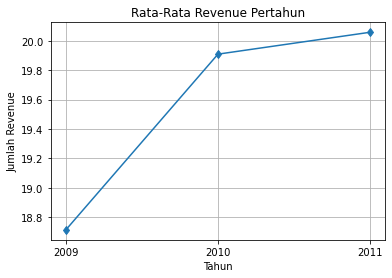

In [23]:
import matplotlib.pyplot as plt

online_retail.groupby('Year')['Revenue'].mean().plot(kind='line', marker='d')
plt.xticks([2009,2010,2011],rotation=0)
plt.grid('y')
plt.title("Rata-Rata Revenue Pertahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Revenue")
plt.show()

Interpretasi : Jumlah Revenue Meningkat Pertahun, Peningkatan paling tajam ada di antara 2009 - 2010<br>Dari dibawah 18.8 hingga mendekati 20.0